ASSIGNMENT: SVM-1

1. What is the mathematical formula for a linear SVM?

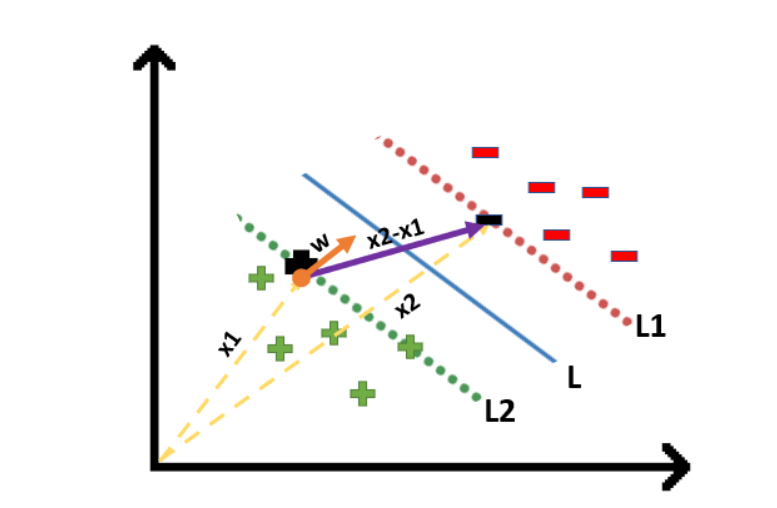

We already know how to find the projection of a vector on another vector. We do this by dot-product of both vectors

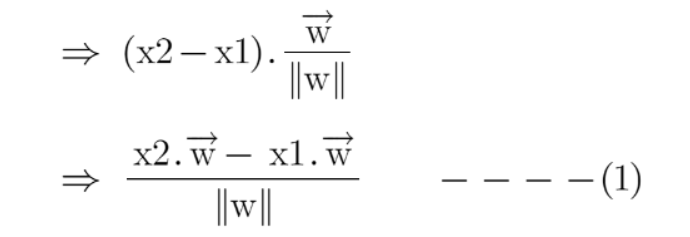

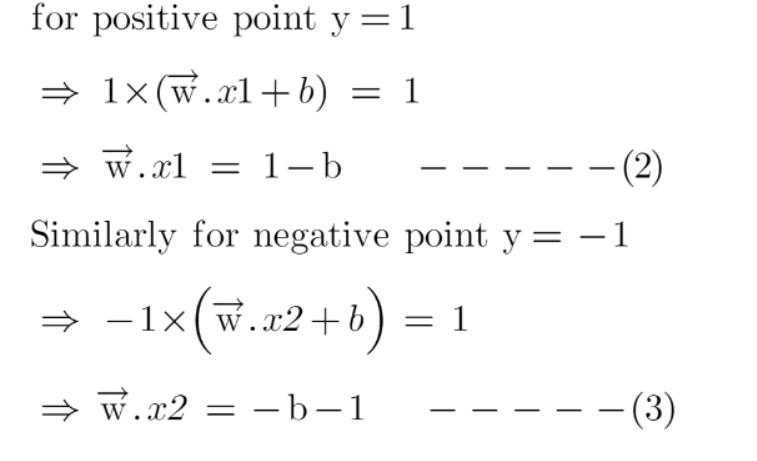

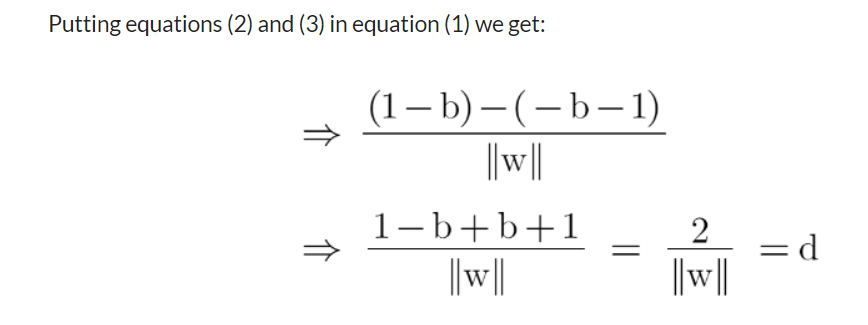

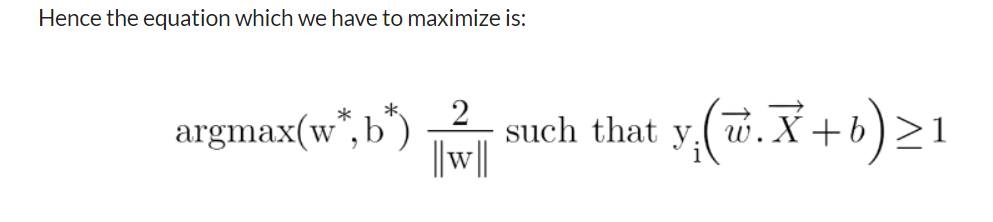

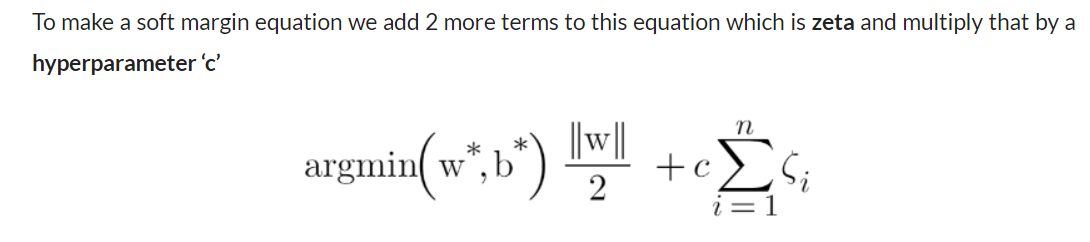

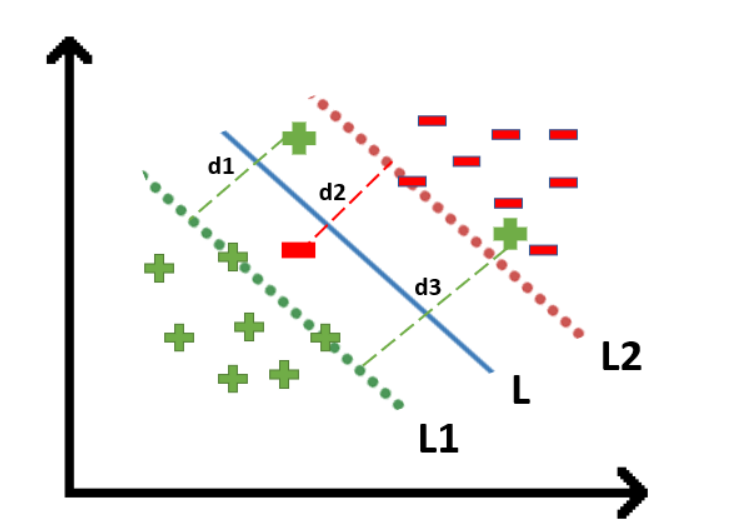

2. What is the objective function of a linear SVM?

SVMs are trained by maximizing the margin, which is the amount of space between the decision boundary and the nearest example. If your problem isn't linearly separable, though, there is no perfect decision boundary and so there's no "hard-margin" SVM solution. This is why the "soft-margin" SVM was introduced, which allows some points to be on the wrong side of the margin.

ξi
 is the slack variable defining how much on the wrong side the i
th training example is. If ξi=0
, the point was classified correctly and by enough of a margin; if it's between 0 and 1, the point was classified correctly but by less of a margin than the SVM wanted; if it's more than 1, the point was classified incorrectly. (ξi
 isn't allowed to be negative.) Points with ξi>0
, as well as those with ξi=0
 closest to the decision boundary, are known as support vectors because they "support" the margin. These are important in a kernel SVM because they're the only ones you need to worry about when predicting on new data.

C
 is a parameter of the problem that defines how soft the margin should be. As C→∞
, you get a hard SVM; if C=0
, the SVM doesn't care about getting the right answer at all and will just choose w=0
. In practice, you usually try a few different values of C
 and see how they perform

3.  What is the kernel trick in SVM?

The most interesting feature of SVM is that it can even work with a non-linear dataset and for this, we use “Kernel Trick” which makes it easier to classifies the points. Suppose we have a dataset like this:

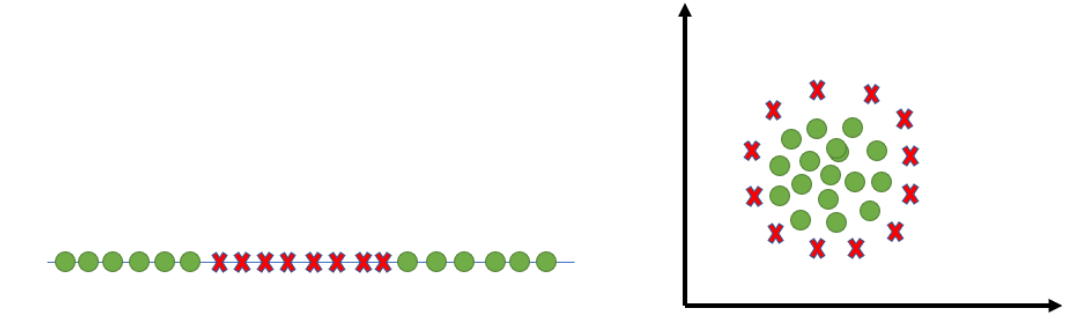

Here we see we cannot draw a single line or say hyperplane which can classify the points correctly. So what we do is try converting this lower dimension space to a higher dimension space using some quadratic functions which will allow us to find a decision boundary that clearly divides the data points. These functions which help us do this are called Kernels and which kernel to use is purely determined by hyperparameter tuning.

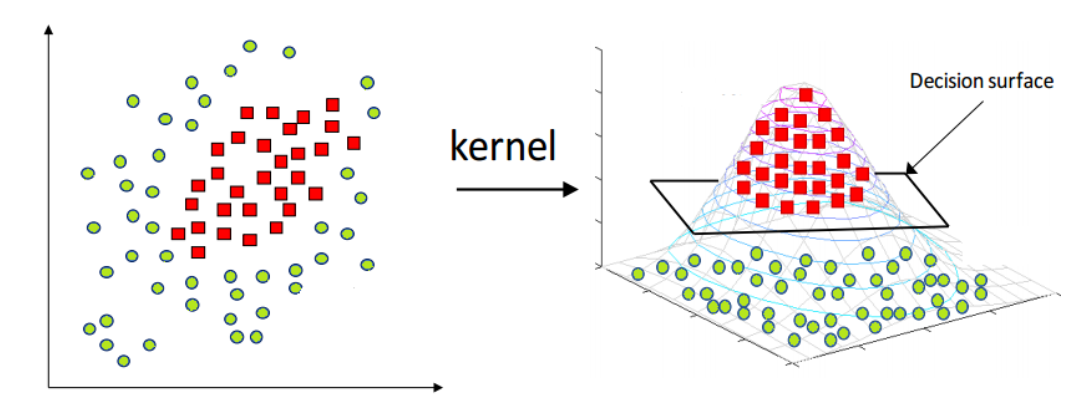



4. What is the role of support vectors in SVM Explain with example

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

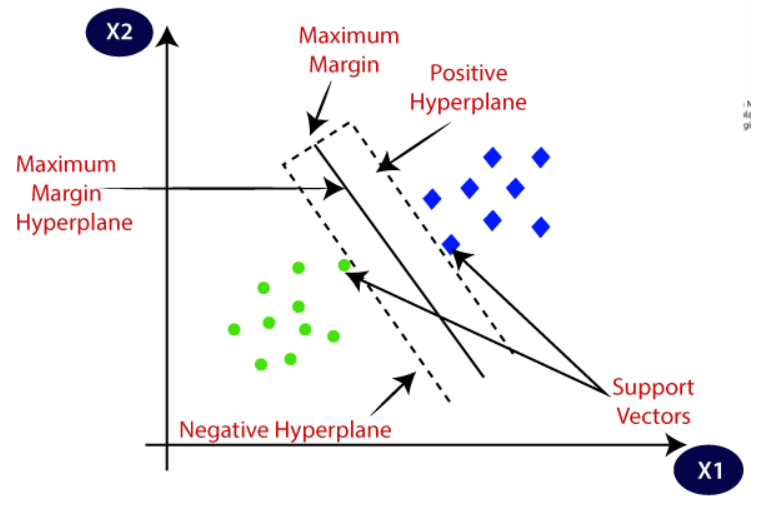

5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in 
SVM?

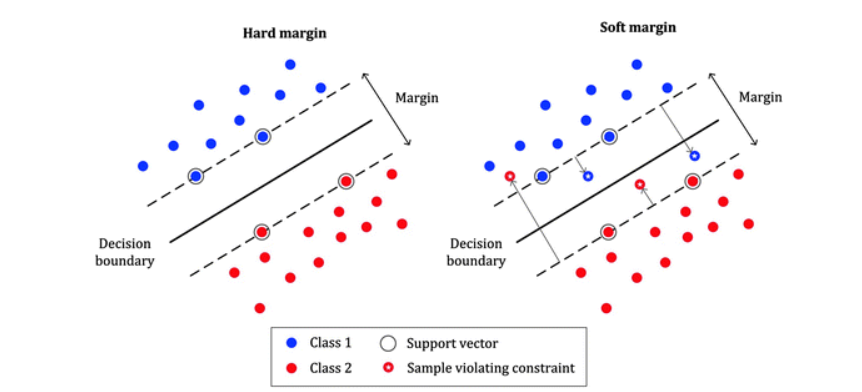

6. SVM Implementation through Iris dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_iris


In [22]:
iris = load_iris()


In [23]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
df['target'] = iris.target


In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot: >

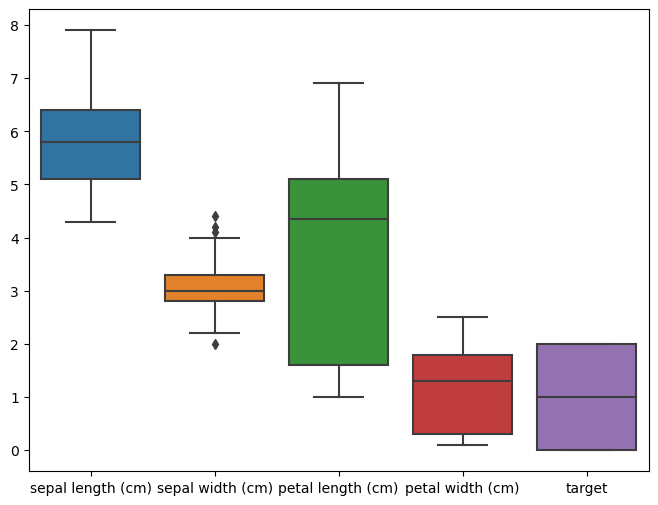

In [31]:
fig = plt.figure(figsize=(8, 6))

sns.boxplot(data=df)

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

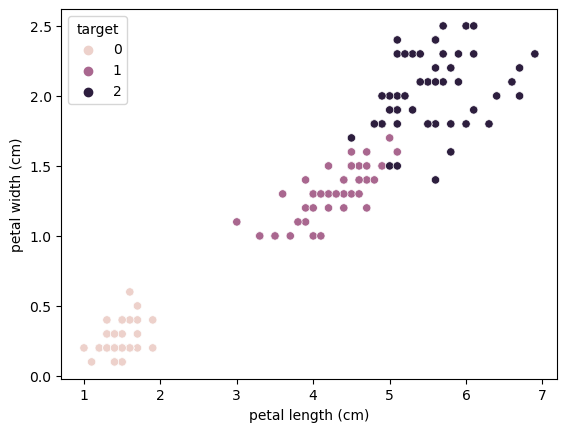

In [42]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='target',data=df)	

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

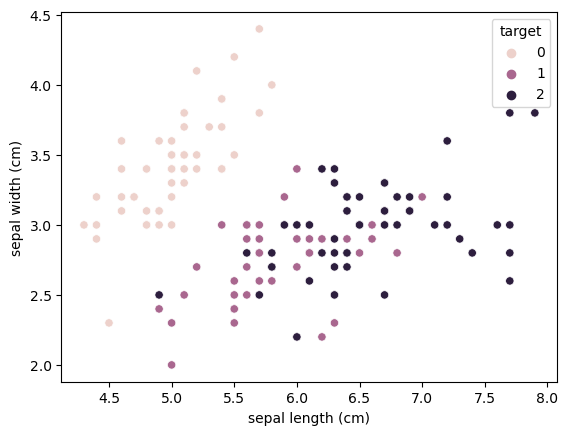

In [43]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='target',data=df)	

In [32]:
X=df.iloc[:,:-1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 120
Test set size: 30


In [37]:
from sklearn.svm import LinearSVC


In [38]:
svm = LinearSVC()
svm.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [39]:
y_pred = svm.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


To plot the decision boundaries of the trained SVM model on the iris dataset using two of the features, we can create a scatter plot of the data points and color them based on their predicted class label. We can also plot the decision boundary by creating a grid of points and predicting the class label for each point.

In [45]:
X = iris.data[:, :2]  # Use only two features for visualization
y = iris.target

In [51]:
from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X, y)

SVC(kernel='linear')

In [53]:
# Define the boundaries of the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the values of the mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])